# Table of Contents

1. [OC20 Overview](#1)
    1. [Motivation and Goal of OC20](#1.1)
        1. [Description of the Problem](#1.1.1)
        2. [Hydrogen Energy Storage (HES) & Electrocatalysis](#1.1.2)
        3. [Relaxation Energy](#1.1.3)
    2. [Method for Catalyst Search](#1.2)
        1. [Current Techniques](#1.2.1)
        2. [Machine Learning Approach](#1.2.2)
    3. [Tasks](#1.3)
        1. [Task 1: Structure to Energy and Forces(S2EF)](#1.3.1)
        2. [Task 2: Initial Structure to Relaxed Structure(IS2RS)](#1.3.2)
        3. [Task 3: Initial Structure to Relaxed Energy(IS2RE)](#1.3.3)
2. [OC20 Dataset](#2)
    1. [Introduction](#2.1)
    2. [Data Generation](#2.2)
        1. [Adsorbate Selection](#2.2.1)
        2. [Surface Selection](#2.2.2)
        3. [Initial Structure Generation](#2.2.3)
        4. [Structure Relaxation](#2.2.4)
        5. [Molecular Dynamics(MD) and Rattled Calculations](#2.2.5)
        6. [Dataset Profile](#2.2.6)
    3. [Train, Validation and Test Splits](#2.3)
3. [Hands-On Data Exploration for OC20 Dataset](#3)
   1. [Trajectories](#3.1)
        1. [Reading Trajectectory Files](#3.1.1)
        2. [Visualizing Trajectories](#3.1.2)
        3. [Data Content](#3.1.3)
        4. [Examining as Tabular Data](#3.1.4)
        5. [Visualizing Energy & Forces](#3.1.5)
    2. [S2EF Dataset](#3.2)
        1. [Reading the Dataset](#3.2.1)
        2. [Features](#3.2.2)
        3. [Adsorbtion Energy Distribution](#3.2.3)
        4. [Data Object to Atoms Object](#3.2.4)
        5. [Exploring Converted Data](#3.2.5)
    3. [IS2R(*) Datasets](#3.3)
        1. [Features](#3.3.1)
        2. [Inspection & Visualization of Data](#3.3.2)

<a class="anchor" id="1"></a>
# ***OC20 Overview***

<a class="anchor" id="1.1"></a>
### **Motivation and Goal of OC20**

<a class="anchor" id="1.1.1"></a>
#### *Description of the Problem*

The main problem OC20 dataset aims to solve in the long term is the **high expenses of energy storage**. Consequently, the **climate change problem**.

Rising indications of climate change has pushed many countries to expand the share of renewable energy sources in their economy. However, due to the **hours of consumption** not matching with the **hour of maximum production** of renewable energy sources, there is a **need for low-cost energy storage systems** to further implement renewable energy technologies. Below is a figure describing the energy consumption-production for California.
<a class="anchor" id="1.1.2"></a>
<img src="./Figures/fig_energydemand.jpg" width=300>

#### *Hydrogen Energy Storage (HES) & Electrocatalysis*

A promising method to store energy is ***Hydrogen Energy Storage (HES)***. HES can store vast quantities of energy cheaply in the form of hydrogen which is produced by the electrolysis of water. However, this process is highly dependent on the electrocatalyst used in the system to increase efficiency, and current state-of-art high efficiency electrocatalysts such as iridium and platinum are *expensive noble metals*. ***Goal is finding a low-cost, efficient, and durable electrocatalyst*** for this reaction. If such catalyst can be found, earlier adoption of HES systems could be achieved due to significant cost reductions.

<a class="anchor" id="1.1.3"></a>
#### *Relaxation Energy*

For the same adsorbate, different catalysts have different adsorbtion energies. If the energy is too low, bond between the adsorbate and the surface gets too strong and adsorbate cannot escape from the surface. If the energy is too high, the bond is too weak and the adsorbate cannot separate. The energy-activity graph of oxygen can be seen below.

<img src="./Figures/fig_volcano.jpg" width=300>

It can be seen that it is a "volcano plot" with a peak point near platinum. Thus, our task is to find a cost-efficient catalyst near the peak.

<a class="anchor" id="1.2"></a>
### **Method for the Catalyst Search**

<a class="anchor" id="1.2.1"></a>
#### *Current Techniques*

Current techniques for designing catalyst performed by simulating the interaction of a *adsorbate* with a catalyst surface in a process called *adsorbtion* using ***Density Functional Theory (DFT)***. DFT uses the locations of the atomic nuclei to predict the energy of the system and the forces acting on each atom. The locations of the atomic nuclei are iteratively updated to minimize the energy, converging to a local minima (*Relaxation*). Energy of the resulting system, gives us insight about the efficiency of the reaction, as described above. Though DFT computation is highly accurate, it is also computationally very expensive. Considering the billions of simulations required to scan the catalyst search space, this method is practically unadoptable.

<a class="anchor" id="1.2.2"></a>
#### *Machine Learning Approach*

Properly tuned *Deep Learning(DL)* models have shown the ability to perform good predictions for certain problems if they are trained under a large dataset of DFT calculations. Computing DFT approximations using DL models, then simulating the most promising materials through traditional DFT calculations could increase computational efficiency of the process tremendously. This way, search can be done by computational brute force.

<a class="anchor" id="1.3"></a>

### **Tasks**

There is three correlated tasks defined to address the problem of efficient catalyst search.
If we can train very high accuracy models for S2EF, this model can later be used iteratively for the other two tasks. However, after testing the models, it was observed that *only 1%* of the predictions made by S2EF models are accurate enough to be practically useful. Direct predictions without iterative steps of S2EF was observed to be practically unuseful too. So, the main outcome of this research, is on S2EF. Description of each task is provided below.

<img src="./Figures/fig_iterative.jpg" width=300>

<a class="anchor" id="1.3.1"></a>
#### *Task 1: Structure to Energy and Forces(S2EF)*

In this task, our models aim to predict the structures energy and per-atom forces when the structure is given as input. The exact properties of attributes will later be discussed. This task is a *cost-efficient replication of DFT calculations* and could be used, if provided enough accuracy and precision, instead of it. Thus, this is the focused task of this research and will be given higher priority.

<a class="anchor" id="1.3.2"></a>
#### *Task 2: Initial Structure to Relaxed Structure(IS2RS)*

This task estimates the **relaxed structure** given an initial structure. It can be performed **itaretively using S2EF** with an optimizer or **directly** by a model trained for this task.

<a class="anchor" id="1.3.3"></a>
#### *Task 3: Initial Structure to Relaxed Energy(IS2RE)*

This task estimates the **relaxed energy** given an initial structure. There are two methods to perform. Relaxed structure can be estimated **using optimization of S2EF** and then the final structures energy can be given as output or a **direct prediction** can be made.

<a class="anchor" id="2"></a>
# ***OC20 Dataset***

<a class="anchor" id="2.1"></a>
### **Introduction**

Even though there exist other datasets that are currently in use for similar tasks (such as QM9), they lack the specialization and especially the vast amount of data, which is critical for DL models.

OC20 is especially designed to perform both training and evaluation on the above described tasks. Since amount of data is crucial, OC20 includes:
- 640,081 relaxations across a wide variety of surfaces and adsorbates.
- The intermediate structures and their corresponding energy and forces are provided for each relaxation resulting in over 133 million training structures.


<a class="anchor" id="2.2"></a>
### **Data Generation**

Data generation is performed in four steps. Each step is shortly described below. The generation workflow can be accessed ***[here](https://github.com/Open-Catalyst-Project/Open-Catalyst-Dataset)***.

<a class="anchor" id="2.2.1"></a>
#### *1. Adsorbate Selection*

***Adsorbates are sampled randomly from 82 molecules*** that are especially chosen from the intermediates of reactions related to renewable energy applications. A table containing information about all adsorbates is given below.

<img src="./Figures/fig_adsorbates.jpg" width=400>

They are categorized into four subgroups: Only $O$ and $H$ containing, $C_1$ molecules, $C_2$ molecules, $N$ based molecules. $C_1$ are small molecules with at least 1 carbon, $C_2$ are large molecules with at least 2 carbons.

$C_1$ and $C_2$ molecules are important for solar fuel synthesis, while $N$ based molecules have applicability in solar fuel and solar chemical synthesis. $O$ and $H$ molecules are enumerated for their presence in water-solvated electrochemical reactions.

<a class="anchor" id="2.2.2"></a>
#### *2. Surface Selection*

Surfaces are sampled in four stages:
1. The **number of elements** in the material is selected with **5%, 65%, 30%** chances of selecting **unary, binary, ternary** material respectively.
2. A stable **bulk material** with determined number of elements is chosen.
3. Symmetrically distinct surfaces of material with **miller indices less than or equal to 2** are determined. One surface is randomly selected. 
4. The surface **atoms were replicated** with minimum depth and width of at least **7 Å and 8 Å**, respectively.

Details:
- Elements for the **bulk materials** were chosen from a set of 55 elements comprising reactive nonmetals, alkali metals, alkaline earth metals, metalloids, transition metals, and post-transition metals.
  
  List of Elements: 'Ag', 'Y', 'N', 'Fe', 'Zr', 'Zn', 'Cu', 'Pb', 'S', 'Pt', 'W', 'P', 'Mo', 'Au', 'Ge', 'Ta',
  'Te', 'Si', 'Sr', 'Se', 'Na', 'Tl', 'Ti', 'Pd', 'H', 'Rb', 'Ni', 'Co', 'V', 'Al', 'Hg',
  'B', 'Rh', 'Bi', 'Ir', 'K', 'Tc', 'Hf', 'C', 'As', 'Sn', 'Sc', 'Sb', 'Os', 'Cd', 'Cr',
  'Ru', 'Ga', 'Re', 'Cl', 'Cs', 'Nb', 'In', 'Ca', 'Mn'.
  
- Material and surface selection are performed with **Pymatgen**. Materials are selected from **Materials Project** with non-positive formation energies and **energies-above-lower-hulls of at most 0.1 eV/atom**. 

- DFT was used to re-optimize the bulk structures prior to surface enumeration.

Note: The paper (OC20 Dataset and Community Challenges) defines three steps and takes step 3 and 4 as a whole. However, I believe it is much more intuitive to split these steps for demonstration purposes.

<a class="anchor" id="2.2.3"></a>
#### *3. Initial Structure Generation*

**Surface atoms** are identified by their positions above the center-of-mass, their z-distance within **2  ̊A of the upper-most atom**, and by their under-coordination relative to the bulk atoms.

1. Atomic coordination environments were calculated using pymatgen’s Voronoi tesselation algorithm.
2. Adsorbates' binding atoms are manually tagged, both for mono- and bi-dentate adsorbates.
3. Surface structure, adsorbate, identified surface atoms and binding sites are given to CatKit.
4. Using CatKit, a list of symmetrically distinct adsorbtion sites and suggested per-site orientations for the adsorbates are enumerated.
5. An adsorbtion configuration is randomly selected from the list **without considering minimum energy**.
6. Since our goal is to compute the adsorbtion energies, two set of inputs are generated:
     - Only the catalyst atoms -> **616,124 Unique Input**
     - Catalyst atoms with the adsorbate placed on top. -> **1,919,165 Unique Input**
     
The generated inputs will later be filtered and segregated for their purposes.

<a class="anchor" id="2.2.4"></a>
#### *4. Structure Relaxation*

Relaxations performed with Vienna Ab Initio Simulation Package(VASP). Calculations are allowed to iterate until per atom **forces become <= 0.03 eV/Å** or **144 hours on 12 cores** is lapsed. The calculations which have not converged until time out were set aside specifically for S2EF calculations which does not require convergence. All the intermediate structures are saved with energy and force data for all calculations. Only the surface and adsorbate atoms are allowed to move during relaxations to prevent unrealistic structure deformations.

Note: There are specific choices made for DFT calculations that were briefly mentioned in the paper. However, they are not rigorously described.

Adsorbtion energies are calculated using the following equation.

$E_{ad} = E_{sys} - E_{slab} - E_{gas}$ 
-> Where $E_{ad}$ is the adsorbtion energy, $E_{sys}$ is the DFT energy of the slab and adsorbate combination(can be relaxed or intermediate structure), $E_{slab}$ and $E_{gas}$ are the DFT energies of relaxed surface and adsorbate molecule, respectively.

<a class="anchor" id="2.2.5"></a>
#### *Molecular Dynamics(MD) and Rattled Calculations*

The above described process likely to result in a dataset biased towards lower energies. For our models to generalize better, we need more diverse data. Two strategies adopted to address this problem.

1. Partial MD Calculations: 
    - Done using VASP.
    - Simulates the case of heat in the system.
    - Done with random initial velocities generated from a Maxwell-Botzman Distribution at 900 K.
    - MD trajectories integrated over **80 fs or 320 fs**, integration step is **2 fs** in micro-canonical ensemble.
2. Rattling: 
    - Done using ASE.
    - Used to increase diversity of the single point calculations by adding random displacements.
    - 20% of the structures from each trajectory are rattled.
    - Displacements sampled from a heuristically  generated normal distribution with **$\mu = 0$, $\sigma = 0.05$**.
    
Approximately **950 thousand MD** (ca. 64 million single-point energies/forces) and **30 million rattled** calculations were carried out.

<a class="anchor" id="2.2.6"></a>
#### *Dataset Profile*

- $\sim$872,000 adsorbtion energies successfully calculated.
- Catalyst types regarding number of elements are given below.
    - 3.7% Unary Catalysts
    - 61.4% Binary Catalysts
    - 34.9% Ternary Catalysts
- Catalyst types regarding element types are given below.
    - 28.9% Reactive Non-metals
    - 8.1% Alkali Metals
    - 10.2% Alkaline Earth Metals
    - 26.4% Metalloids
    - 81.3% Transition Metals
- Adsorbates distributions regarding their groups are given below.
    - 6.6% Only $O$ and $H$.
    - 25.2% $C_1$
    - 44.4% $C_2$
    - 29.00% $N$ Based

<a class="anchor" id="2.3"></a>
### **Train, Validation and Test Splits**

Since our goal is to discover new catalysts, extrapolative evaluation has a huge importance in this research. 

- **Adsorbate extrapolation** is performed by **holding out 14 adsorbates** from the training dataset sampled from all types (O, H, C1, C2, and N) of adsorbates.
- **Catalyst extraplolation** is performed by holding out a subset of element combinations from the training dataset. These were sampled from the **1,485 binary and 26,235 ternary material** combinations of the 55 elements used in the dataset. No surfaces with unary materials are in the extrapolative subsplits for validation and testing.
- The adsorbates in the validation adsorbate subsplit are unique from the adsorbates in the test adsorbate subsplit. This helps ensure overfitting to the test set does not occur during hyperparameter tuning on the validation set.
- The following adsorbates were reserved for validation subsplits: $*CH$, $*CHO$, $*COCH_2OH$, $*COH$, $*NH_2$, $*NH_2N(CH_3)_2$, and $*ONOH$.
- The following adsorbates were reserved for the test subsplits: $*CH_2*CH_2$ , $*CO$, $*COHCH_2$ , $*NHN_2$ , $*NNCH_3$ , $*OCHCH_2$ , and $*ONNO_2$.

Four subslipts covering all the possible combinations of extrapolations were used for each validation and test sets.
1. In-Domain -> No extrapolation.
2. Out-of-Domain Adsorbate(OOD Adsorbate) -> Only adsorbates held out
3. Out-of-Domain-Catalyst(OOD Catalyst) -> Only catalysts held out
4. Out-of-Domain-Both(OOD Both) -> Both adsrobates and catalysts held out

A table containing size information of these splits is given below.

<img src="Figures/fig_splits.jpg" width=500>

For the S2EF, **$\sim$1,000,000** structure subset is chosen for each of the splits of IS2(E and S)**$\sim$25,000**.




<a class="anchor" id="3"></a>
# ***Hands-On Data Exploration for OC20 Dataset***

<a class="anchor" id="3.1"></a>
### **Trajectories**

System trajectories are the main source of data for this research. Even though the data in our splits is randomly sampled from many trajectories, it is more than worth the effort to inspect an example trajectory on its own to gain insight about the dataset in hand.

Trajectories generated and saved into .extxyz files. These files are similar to .xyz files which allows us to save a snapshot of a system. However, .extxyz files allow multiple rows of data for the same system of atoms. Consequently, lets us save multiple snapshots of a system in single file. DFT trajectories in our case.

You can directly access the trajectories used in this notebook from '/Data/Trajectories'. Also you can access all trajectories-per-adsorbate provided by the project from [here](https://github.com/Open-Catalyst-Project/ocp/blob/main/DATASET_PER_ADSORBATE.md).

<a class="anchor" id="3.1.1"></a>
#### *Reading Trajectory Files*
Atomic Simulation Environment provides a useful generalized read function that returns a list of atoms objects of each snapshot. Using ase.io.read(), we can read our trajectory files.

In [7]:
from ase.io import read

trajectory_path = "./Data/Trajectories/random109365.extxyz"

# Note that it only reads the first snapshot if we do not set the index parameter explicitly.
trajectory = read(trajectory_path, index="0:")

# We can print the first 3 structures.
for i in range(0, 3): print(f"{i} -> {trajectory[i]}")
len(trajectory)

0 -> Atoms(symbols='Co12Re12Ti24NO3', pbc=True, cell=[[8.66070756, 0.0, 0.0], [-4.33035378, 7.50039276, -0.0], [0.0, 0.0, 31.82147149]], forces=..., tags=..., constraint=FixAtoms(indices=[0, 2, 3, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 34, 35, 36, 37, 40, 41, 42, 43, 46, 47]), calculator=SinglePointCalculator(...))
1 -> Atoms(symbols='Co12Re12Ti24NO3', pbc=True, cell=[[8.66070756, 0.0, 0.0], [-4.33035378, 7.50039276, -0.0], [0.0, 0.0, 31.82147149]], forces=..., tags=..., constraint=FixAtoms(indices=[0, 2, 3, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 34, 35, 36, 37, 40, 41, 42, 43, 46, 47]), calculator=SinglePointCalculator(...))
2 -> Atoms(symbols='Co12Re12Ti24NO3', pbc=True, cell=[[8.66070756, 0.0, 0.0], [-4.33035378, 7.50039276, -0.0], [0.0, 0.0, 31.82147149]], forces=..., tags=..., constraint=FixAtoms(indices=[0, 2, 3, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,

21

<a class="anchor" id="3.1.2"></a>
#### *Visualizing Trajectories*

Using ase.visualize.view(), we will visualize the relaxation process. You can play with the visualization tools in the ase.gui frame. Enabling show force setting is especially recommended.

For the sake of the readibility of the notebook, non-interactive matlab plots also added.

Note: There are multiple viewer options for view function. Default is "ase" (recommended). ASE requires you to run this cell to open up its GUI (ase.gui).

In [8]:
from ase.visualize import view

# View function sometimes throws a ValueError. This is due to the problematic source code. You can ignore it completely.
view(trajectory, viewer="ase")

<Popen: returncode: None args: ['/Users/irmakaslan/miniforge3/envs/ocp-model...>

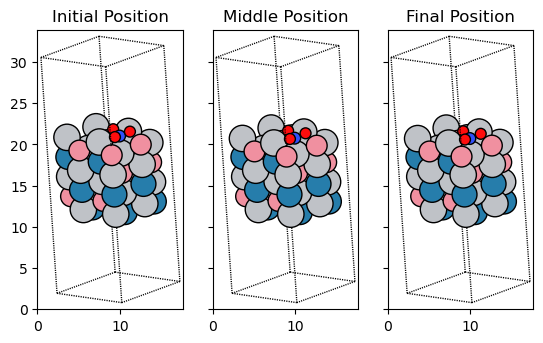

In [10]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

fig, ax = plt.subplots(1, 3, sharey=True)

# Rotation and radius may needed to be changed to gain better view for different positions.
rotation_param = ("-60x, 30y, 20z")

plot_atoms(trajectory[0], rotation=rotation_param, ax=ax[0])
plot_atoms(trajectory[round(len(trajectory) / 2)], rotation=rotation_param, ax=ax[1])
plot_atoms(trajectory[-1], rotation=rotation_param, ax=ax[2])

ax[0].set_title("Initial Position")
ax[1].set_title("Middle Position")
ax[2].set_title("Final Position")

plt.show()

<a class="anchor" id="3.1.3"></a>
#### *Data Content*

We can check the properties stored in the trajectory data. 

In [11]:
import numpy as np

structure_0 = trajectory[0]

# Returns atomic numbers of each atom.
atomic_numbers = structure_0.get_atomic_numbers()

# Returns symbols.
symbols = np.array(structure_0.get_chemical_symbols())

# Returnes the volume containing our system. Represented as its base vectors. (Lines on the visual above)
cell = structure_0.get_cell()

# Returns wether the unit cell is repeated in the x, y, z directions respectively.
periodic_boundary_conditions = structure_0.get_pbc()

# Returns atom tags. (0 -> sub-surface, 1 -> surface, 2 -> adsorbate)
tags = structure_0.get_tags()

# Returns the fixed atoms' indices. Atoms with indices 0 are fixed.
fixed = structure_0.constraints[0].get_indices()

# Returns potential energy of the structure.
energy = structure_0.get_potential_energy()

# Returns x, y, z forces acting on each atom.
# Returns 0 for fixed atoms when apply_constraint=True, calculated values otherwise.
forces = structure_0.get_forces(apply_constraint=True)

In [12]:
atomic_numbers

array([27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 75, 75, 75, 75, 75,
       75, 75, 75, 75, 75, 75, 75, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,  7,  8,  8,
        8])

In [13]:
symbols

array(['Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'Co',
       'Co', 'Re', 'Re', 'Re', 'Re', 'Re', 'Re', 'Re', 'Re', 'Re', 'Re',
       'Re', 'Re', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti',
       'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti', 'Ti',
       'Ti', 'Ti', 'Ti', 'Ti', 'N', 'O', 'O', 'O'], dtype='<U2')

In [14]:
cell

Cell([[8.66070756, 0.0, 0.0], [-4.33035378, 7.50039276, -0.0], [0.0, 0.0, 31.82147149]])

In [15]:
periodic_boundary_conditions

array([ True,  True,  True])

In [16]:
tags

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 2, 2, 2], dtype=int32)

In [17]:
fixed

array([ 0,  2,  3,  5,  6,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 28, 29, 30, 31, 34, 35, 36, 37, 40, 41, 42, 43,
       46, 47])

In [18]:
energy

-417.48791192

In [19]:
# We print only the first three due to space limitations.
forces[0:3]

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.46355733, -0.2676199 , -0.65030973],
       [ 0.        ,  0.        ,  0.        ]])

<a class="anchor" id="3.1.4"></a>
#### *Examiming as Tabular Data*

Even though there is no essential practical need, it would still be useful to view all the data in a single structure in the tabular format for clarity. We will use pandas for this task. Then, we will give a few examples of visualizations using pandas in case reader needs for further research.

In [20]:
import pandas as pd

df = pd.DataFrame({
    "n": atomic_numbers,
    "sym": symbols,
    "tag": tags,
    "force_avg": np.array([np.average(np.sqrt(np.sum(snap ** 2, axis=0))) for snap in forces]),
    "force_x": forces[:, 0],
    "force_y": forces[:, 1],
    "force_z": forces[:, 2]
})

# We can also change tag numbers to names.
df["tag"].replace({0: "sub-surface", 1: "surface", 2: "adsorbate"}, inplace=True)

df.head(15)

,n,sym,tag,force_avg,force_x,force_y,force_z
0,27,Co,sub-surface,0.000000,0.000000,0.000000,0.000000
1,27,Co,surface,0.842264,0.463557,-0.267620,-0.650310
2,27,Co,sub-surface,0.000000,0.000000,0.000000,0.000000
3,27,Co,sub-surface,0.000000,0.000000,0.000000,0.000000
4,27,Co,surface,0.843159,0.000605,0.537601,-0.649540
5,27,Co,sub-surface,0.000000,0.000000,0.000000,0.000000
6,27,Co,sub-surface,0.000000,0.000000,0.000000,0.000000
7,27,Co,surface,0.839897,-0.463073,-0.267961,-0.647446
8,27,Co,sub-surface,0.000000,0.000000,0.000000,0.000000
9,27,Co,sub-surface,0.000000,0.000000,0.000000,0.000000


Using the benefits of pandas, we can also plot some properties with seaborn. A few examples are given below.

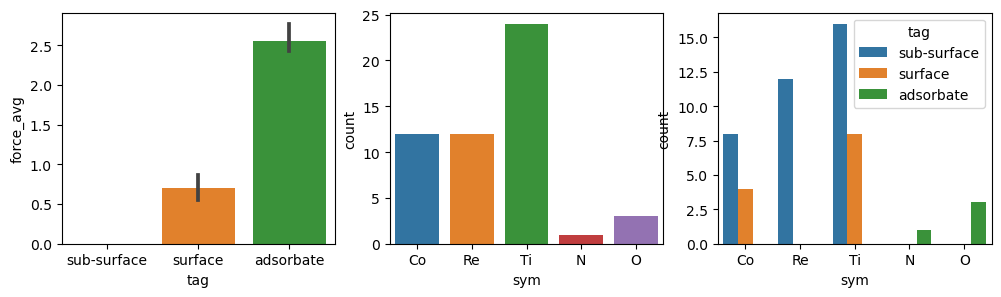

In [21]:
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
# Plots average force over atom tags.
sns.barplot(data=df, x="tag", y="force_avg", ax=ax[0])

# Plots number of atoms over atom types.
sns.countplot(data=df, x="sym", ax=ax[1])

# Plots the count of each tag over atom types.
sns.countplot(data=df, x="sym", hue="tag", ax=ax[2])

plt.show()

<a class="anchor" id="3.1.5"></a>
#### *Visualizing Energy & Forces*

Using matplotlib, we can plot energy and average force over iteration. 

- It can be seen that the energy converges to its minimum with forces. If the force converges below $0.03 eV/Å$, we can use the data generated from this trajectory in our IS2* datasets. Otherwise, the data is reserved for S2EF task. The dashed red line indicates the minimum value of force.
- Number of steps can be different from example to example. Details are discussed above.

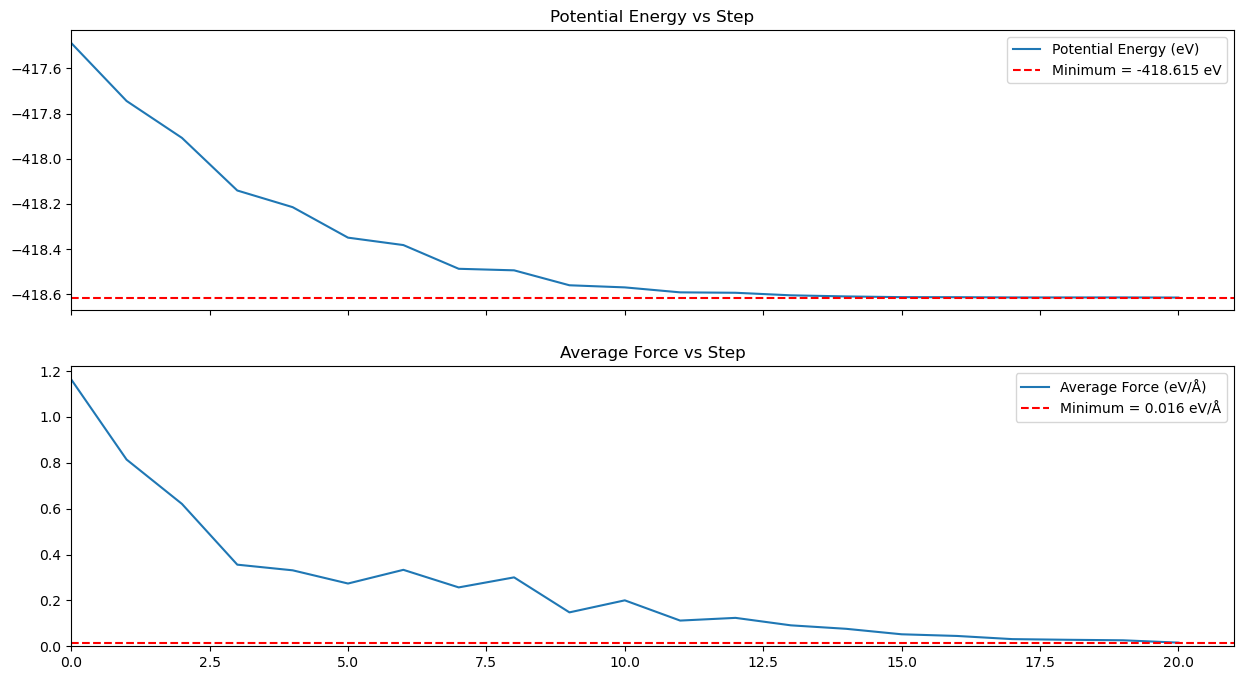

In [22]:
# Get energies for each structure.
energies = [structure.get_potential_energy() for structure in trajectory]

# Calculates average forces on non-fixed atoms.
non_zero_forces = np.array([structure.get_forces()[~np.all(structure.get_forces() == 0, axis=1)] for structure in trajectory])
average_forces = np.array([np.average(np.sqrt(np.sum(snap ** 2, axis=1))) for snap in non_zero_forces])

fig, [ax1, ax2] = plt.subplots(2, figsize=(15,8), sharex=True)

ax1.plot(energies)
ax1.set_title("Potential Energy vs Step")
ax1.set_xlim(0)
# Adds minimum line.
ax1.axhline(np.min(energies), linestyle="--", color="r",)
# Adds legend.
ax1.legend(["Potential Energy (eV)", f"Minimum = {np.min(energies).round(3)} eV"])


ax2.plot(average_forces)
ax2.set_title("Average Force vs Step")
ax2.set_ylim(0)
ax2.axhline(np.min(average_forces), linestyle="--", color="r")
ax2.legend(["Average Force (eV/Å)", f"Minimum = {np.min(average_forces).round(3)} eV/Å"])

plt.show()

Following code simulates adsorbtion energy calculations. This part is optional and only here for demonstration purposes.

EMT is implemented as calculator for slab calculations. However, due to the limitations of ASE EMT calculator, it can only be used on elements:
- H, C, N, O, Al, Ni, Cu, Pd, Ag, Pt and Au.

If there exist a catalyst with elements other than above, code will still run but instead of plotting the data, it will warn the user.

Metal calculations are quite accurate. H, C, N and O are for toying around.

Gas phase reference energies are taken from the paper:

<img src="./Figures/fig_gas.jpg" width=300>


In [23]:
from ase.calculators.emt import EMT

# Gets relaxed energy from the last structure of the trajectory.
relaxed_energy = trajectory[-1].get_potential_energy()

# Gets adsorbate atoms using their tags.
adsorbate_mask = (tags == 2)
adsorbate = structure_0[adsorbate_mask]

# Define gas energies. Numbers adopted from the paper.
gas_energies = {"H": -3.477, "O": -7.204, "C": -7.282, "N": -8.083}

# Get adsorbate symbols. Repetitive for multiple number of same element. 
adsorbate_sym = adsorbate.get_chemical_symbols()
adsorbate_energy = 0

# Computes adsorbate reference energy.
for element in adsorbate_sym:
    adsorbate_energy += gas_energies[element]

# Gets slab atoms using their tags.
slab_mask = ((tags == 0) | (tags == 1))
slab = structure_0[slab_mask]

# There are other calculators. However, they either need implementation or not suited for this task.
slab.set_calculator(EMT())

# Check if EMT can be used. Plot if yes, warn if not.
try:
    slab_energy = slab.get_potential_energy()
    adsorbtion_energy = relaxed_energy - slab_energy - adsorbate_energy
    
    print(f"Relaxed Energy: {relaxed_energy}\nReference Slab Energy: {slab_energy}\nReference Adsorbate Energy: {adsorbate_energy}")
    print(f"Adsorbtion Energy: {adsorbtion_energy}")
    
    step_energies =  np.array(energies) - slab_energy - adsorbate_energy
    plt.plot(step_energies)
    plt.axhline(np.min(step_energies), linestyle="--", color="r",)
    plt.legend(["Potential Energy (eV)", f"Minimum = {np.min(step_energies).round(3)} eV"])
except:
    print("Either slab or adsorbate element is not implemented! Check elements!")
    

Either slab or adsorbate element is not implemented! Check elements!


<a class="anchor" id="3.2"></a>
### **S2EF Dataset**

In this section, we will directly explore the 200k training set provided by OCP by interacting with '.lmdb' files. The methods and codes here can be extended for the uses of other S2EF datasets.

<a class="anchor" id="3.2.1"></a>
#### *Reading the Dataset*

We can read our '.lmdb' file using ocpmodels.datasets.LmdbDataset. Structures are stored in Data objects in a very similar manner to Atoms objects we explored above.

In [24]:
from ocpmodels.datasets import LmdbDataset

# Path to the dataset folder should be given.
dataset_path = "Data/Datasets/S2EF_200K/"

dataset = LmdbDataset({"src": dataset_path})

<a class="anchor" id="3.2.2"></a>
#### *Features*

Features labeled in a very similar manner to the Atoms objects. We can check the labels and values.

Note that the dataset used in this notebook does not include edge information due to storage limitations. OCP allows you to chose whether or not the edge information is included in the downloaded dataset.
-  ~10x storage requirement, ~3-5x slowdown for edge information included datasets.
-  Larger GPU memory required for not included.

In [25]:
# Print data object.
data = dataset[20312]
data

Data(pos=[137, 3], cell=[1, 3, 3], atomic_numbers=[137], natoms=137, tags=[137], y=-121.36142527, force=[137, 3], fixed=[137], sid=673211, fid=62, id='0_20312')

In [26]:
# Print the position data of the first three atoms.
data.pos[:3]

tensor([[ 6.6495,  9.2626, 13.0912],
        [ 0.0000,  0.0000, 19.7407],
        [ 3.3247,  0.0000, 16.4159]])

In [27]:
# Print cell vectors.
data.cell

tensor([[[13.2990,  0.0000, -0.0000],
         [ 3.3247, 18.5252, -3.3247],
         [ 0.0000,  0.0000, 39.8970]]])

In [28]:
# Print atomic numbers of each atom.
data.atomic_numbers

tensor([11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
        11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
        11., 11., 11., 11., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48.,
        48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48.,
        48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48.,
        48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48.,
        48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48.,
        48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48.,
        48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48.,
        48., 48.,  6.,  6.,  1.,  1.,  1.,  1.,  1.,  8.,  8.])

In [29]:
# Print tags of each atom.
data.tags

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
# Print energy.
data.y

-121.36142527

In [31]:
# Print forces on first three atoms.
data.force[:3]

tensor([[ 0.0011, -0.1636, -0.1400],
        [-0.0014,  0.0020, -0.0076],
        [ 0.0052,  0.0150, -0.0715]])

In [32]:
# Print fixed condition.(1=fixed)
data.fixed

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
# Print unique system identifier(randomly generated for each system).
data.sid

673211

In [34]:
# Print frame index along the trajectory.
data.fid

62

In [35]:
# Print data ID. ([split no]_[index along dataset])
data.id

'0_20312'

<a class="anchor" id="3.2.3"></a>
#### *Adsorbtion Energy Distribution*

Below code plots the density estimation of adsrobtion energies over the whole 200k dataset.

In [36]:
energies = np.array([data.y for data in dataset])

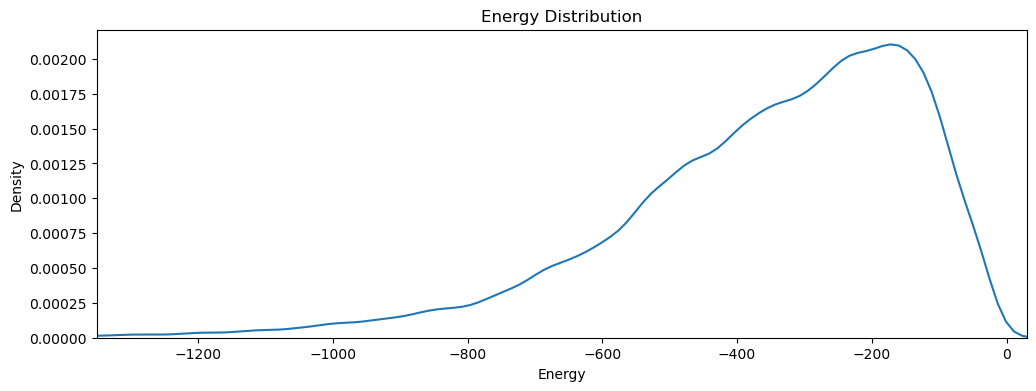

In [37]:
plt.figure(figsize=(12, 4))

sns.kdeplot(energies)

plt.xlim([-1350, 30])
plt.title("Energy Distribution")
plt.xlabel("Energy")

plt.show()

<a class="anchor" id="3.2.4"></a>
#### *Data Object to Atoms Object*

We may need to examine our structures in ASE. To to this, we first need to convert our Data objects to Atoms objects. OCP provides functionality for this task.

In [39]:
from ocpmodels.common.relaxation.ase_utils import batch_to_atoms
from ocpmodels.datasets import data_list_collater

# We will convert the first 500 structures for demonstration purposes.
batch = data_list_collater([dataset[i] for i in range(0, 500)])
atoms_objects = batch_to_atoms(batch)

# First three structures.
atoms_objects[:3]

[Atoms(symbols='C2H2Ge32OSc40', pbc=True, cell=[[13.9553861618042, 0.0, -0.0], [-0.0, 10.316191673278809, 0.10768470168113708], [0.0, 0.0, 30.95026206970215]], tags=..., constraint=FixAtoms(indices=[1, 3, 4, 6, 8, 10, 13, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 37, 38, 40, 43, 45, 46, 47, 49, 50, 51, 52, 55, 57, 58, 59, 60, 61, 62, 63, 64, 67, 69, 70, 71]), calculator=SinglePointCalculator(...)),
 Atoms(symbols='Ca24Rh12N2O', pbc=True, cell=[[14.087377548217773, 0.0, 0.0], [3.5218443870544434, 7.847881317138672, -0.6539900898933411], [0.0, 0.0, 37.931427001953125]], tags=..., constraint=FixAtoms(indices=[0, 1, 3, 5, 6, 8, 9, 10, 12, 13, 15, 17, 18, 20, 21, 22, 24, 25, 27, 28, 30, 31, 33, 34]), calculator=SinglePointCalculator(...)),
 Atoms(symbols='Na24Hg8CH4', pbc=True, cell=[[13.272872924804688, 0.0, -5.718112468719482], [2.9412896633148193, 8.332319259643555, -2.3044540882110596], [0.0, 0.0, 36.52708435058594]], tags=..., constraint=FixAtoms(indic

<a class="anchor" id="3.2.5"></a>
#### *Exploring Converted Data*

We can treat the converted objects in exactly the same manner to trajectories. An example of visualization is given below.

It is now visible that the structures in our 200k dataset are not coming from a single DFT trajectory. They are distinct.

In [40]:
view(atoms_objects)

<Popen: returncode: None args: ['/Users/irmakaslan/miniforge3/envs/ocp-model...>

Traceback (most recent call last):
  File "/Users/irmakaslan/miniforge3/envs/ocp-models/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/irmakaslan/miniforge3/envs/ocp-models/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/irmakaslan/miniforge3/envs/ocp-models/lib/python3.9/site-packages/ase/gui/pipe.py", line 32, in <module>
    main()
  File "/Users/irmakaslan/miniforge3/envs/ocp-models/lib/python3.9/site-packages/ase/gui/pipe.py", line 28, in main
    plt.show()
  File "/Users/irmakaslan/miniforge3/envs/ocp-models/lib/python3.9/site-packages/matplotlib/pyplot.py", line 446, in show
    return _get_backend_mod().show(*args, **kwargs)
  File "/Users/irmakaslan/miniforge3/envs/ocp-models/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/Users/irmakaslan/miniforge3/envs/ocp-models/lib/python3.9/site-packages/IPython/core/

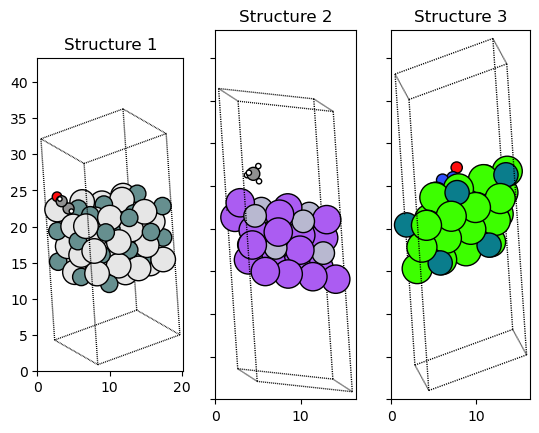

In [41]:
fig, ax = plt.subplots(1, 3, sharey=True)

# Rotation and radius may needed to be changed to gain better view for different positions.
rotation_param = ("-60x, 30y, 20z")

# First three structures in our dataset.
plot_atoms(atoms_objects[0], rotation=rotation_param, ax=ax[0])
plot_atoms(atoms_objects[2], rotation=rotation_param, ax=ax[1])
plot_atoms(atoms_objects[1], rotation=rotation_param, ax=ax[2])

ax[0].set_title("Structure 1")
ax[1].set_title("Structure 2")
ax[2].set_title("Structure 3")

plt.show()

<a class="anchor" id="3.3"></a>
### **IS2R(*) Datasets** 

Now, we will inspect the dataset provided for IS2RS and IS2RE. This datasets are quite similar to S2EF. However, they contain different information. We will skip the same parts with S2EF and focus on what is different here.

In [42]:
dataset_2 = LmdbDataset({"src": "Data/Datasets/IS2/data.lmdb"})

data_2 = dataset_2[5]

data_2

Data(edge_index=[2, 4566], pos=[197, 3], cell=[1, 3, 3], atomic_numbers=[197], natoms=197, cell_offsets=[4566, 3], force=[197, 3], distances=[4566], fixed=[197], sid=1755728, tags=[197], y_init=5.391080130000034, y_relaxed=-0.522701819999952, pos_relaxed=[197, 3])

<a class="anchor" id="3.3.1"></a>
#### *Features*

This time, our data contains edges, cell offsets, initial/final positions, initial energy, and relaxed energy in addition to the features of S2EF dataset. 

In [43]:
# Prints edge information of every atom.

data_2.edge_index

tensor([[128,  50,  73,  ...,  63,  51,  55],
        [  0,   0,   0,  ..., 196, 196, 196]])

In [44]:
# Prints cell offsets.

data_2.cell_offsets

tensor([[-1,  0,  0],
        [ 0,  0,  0],
        [ 0,  1,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]])

In [45]:
# Print initial and final positions for the first 2 atoms.

print(data_2.pos[:2])
print(data_2.pos_relaxed[:2])

tensor([[ 0.0000, 29.6165, 14.8671],
        [ 0.0000, 14.1284, 21.4140]])
tensor([[ 0.0000, 29.6165, 14.8671],
        [13.0575, 14.0968, 21.8329]])


In [46]:
# Print initial and relaxed energies.

print(data_2.y_init)
print(data_2.y_relaxed)

5.391080130000034
-0.522701819999952


<a class="anchor" id="3.3.2"></a>
#### *Inspection & Visualization of the Data*
Here, we will try to visualize what is contained in our datasets. We have more material to cover here due to the features on the dataset compared to S2EF dataset.

First, lets convert our data into Atoms objects. Since batch_atoms function doesn't work here, we need to write our own code. (You can also modify the source code but since this is a more rigorous approach, I will do it this way for the sake of readability.)

In [47]:
import torch
from ase.atoms import Atoms
from ase.constraints import FixAtoms
from ase.calculators.singlepoint import SinglePointCalculator as sp

def batch_to_atoms_is2(batch):
    n_systems = batch.neighbors.shape[0]
    natoms = batch.natoms.tolist()
    numbers = torch.split(batch.atomic_numbers, natoms)
    fixed = torch.split(batch.fixed, natoms)
    forces = torch.split(batch.force, natoms)
    positions_init = torch.split(batch.pos, natoms)
    positions_relaxed = torch.split(batch.pos_relaxed, natoms)
    tags = torch.split(batch.tags, natoms)
    cells = batch.cell
    energies_init = batch.y_init.tolist()
    energies_relaxed = batch.y_relaxed.tolist()

    atoms_objects = []
    for idx in range(n_systems):
        atoms = Atoms(
            numbers=numbers[idx].tolist(),
            positions=positions_init[idx].cpu().detach().numpy(),
            tags=tags[idx].tolist(),
            cell=cells[idx].cpu().detach().numpy(),
            constraint=FixAtoms(mask=fixed[idx].tolist()),
            pbc=[True, True, True],
        )
        calc = sp(
            atoms=atoms,
            energy=energies_init[idx],
            forces=forces[idx].cpu().detach().numpy(),
        )
        atoms.set_calculator(calc)
        atoms_objects.append(atoms)

    atoms_objects_2 = []
    for idx in range(n_systems):
        atoms = Atoms(
            numbers=numbers[idx].tolist(),
            positions=positions_relaxed[idx].cpu().detach().numpy(),
            tags=tags[idx].tolist(),
            cell=cells[idx].cpu().detach().numpy(),
            constraint=FixAtoms(mask=fixed[idx].tolist()),
            pbc=[True, True, True],
        )
        calc = sp(
            atoms=atoms,
            energy=energies_relaxed[idx],
            forces=forces[idx].cpu().detach().numpy(),
        )
        atoms.set_calculator(calc)
        atoms_objects_2.append(atoms)

    return atoms_objects, atoms_objects_2

In [48]:
batch = data_list_collater([dataset_2[i] for i in range(0, 50)])
initial_atoms, final_atoms = batch_to_atoms_is2(batch)

Now, we will investigate a selected pair.

In [49]:
# Print initial structure of index 2.
print(initial_atoms[2])

# Print final structure of index 2.
print(final_atoms[2])

Atoms(symbols='H2Ag9OP9Pd45', pbc=True, cell=[[11.985345840454102, 0.0, 0.0], [0.0, 7.051717758178711, -3.995115280151367], [0.0, 0.0, 35.95603561401367]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60]), calculator=SinglePointCalculator(...))
Atoms(symbols='H2Ag9OP9Pd45', pbc=True, cell=[[11.985345840454102, 0.0, 0.0], [0.0, 7.051717758178711, -3.995115280151367], [0.0, 0.0, 35.95603561401367]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60]), calculator=SinglePointCalculator(...))


We are now ready to visualize our data. 

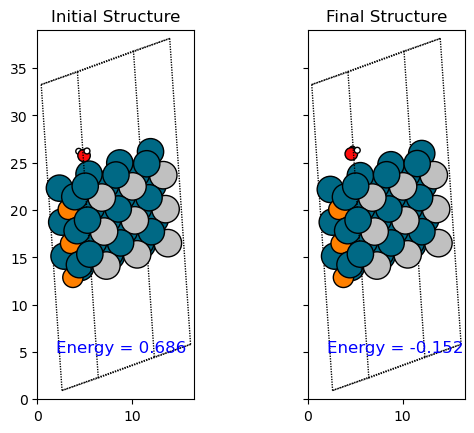

Traceback (most recent call last):
  File "/Users/irmakaslan/miniforge3/envs/ocp-models/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/irmakaslan/miniforge3/envs/ocp-models/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/irmakaslan/miniforge3/envs/ocp-models/lib/python3.9/site-packages/ase/gui/pipe.py", line 32, in <module>
    main()
  File "/Users/irmakaslan/miniforge3/envs/ocp-models/lib/python3.9/site-packages/ase/gui/pipe.py", line 28, in main
    plt.show()
  File "/Users/irmakaslan/miniforge3/envs/ocp-models/lib/python3.9/site-packages/matplotlib/pyplot.py", line 446, in show
    return _get_backend_mod().show(*args, **kwargs)
  File "/Users/irmakaslan/miniforge3/envs/ocp-models/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/Users/irmakaslan/miniforge3/envs/ocp-models/lib/python3.9/site-packages/IPython/core/

In [50]:
view([initial_atoms[2], final_atoms[2]])

fig, ax = plt.subplots(1, 2, sharey=True)

# Rotation and radius may needed to be changed to gain better view for different positions.
rotation_param = ("-60x, 30y, 20z")

plot_atoms(initial_atoms[2], rotation=rotation_param, ax=ax[0])
plot_atoms(final_atoms[2], rotation=rotation_param, ax=ax[1])

ax[0].set_title("Initial Structure")
ax[1].set_title("Final Structure")

ax[0].text(2, 5, f"Energy = {round(initial_atoms[2].get_potential_energy(), 3)}", fontsize=12, color="b")
ax[1].text(2, 5, f"Energy = {round(final_atoms[2].get_potential_energy(), 3)}", fontsize=12, color="b")

plt.show()